<a href="https://colab.research.google.com/github/nyamskamau/Linear-Discriminant-Analysis-/blob/main/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction Based on Customer Behaviour


---



### Understanding the Context


---


* An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is a risk customer and who is not.

* The risk_flag, our target variable, indicates whether there has been a default in the past or not.

Column	Descriptions	

---


* Income - Income of the user	
* Age -	Age of the user	
* Experience - Professional experience of the user in years	
* Profession - Profession	
* Married- Whether married or single
* House_ownership -	Owned or rented or neither	
* Car_ownership - Does the person own a car	
* Risk_flag - Defaulted on a loan	
* Currentjobyears - Years of experience in the current job	
* Currenthouseyears- Number of years in the current residence	
* City - City of residence	
* State - State of residence	



Link to the Dataset - [Loan Prediction Based on Customer Behavior](https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv)

##  1.Data Understanding and Data Preparation

In [ ]:
#Loading the Appropriate Libraries
import pandas as pd
import numpy as np 
import seaborn as sns;
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt


In [ ]:
#Loading the Dataset
loan_data = pd.read_csv('/content/Training Data.csv')

In [ ]:
#Previewing the Dataset
loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#Previewing the Dataset
loan_data.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
#Printing out the information about the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


The dataset had 13 columns and 252,000 rows.

### 1.1. Data Cleaning

In [ ]:
#Checking for null values 
loan_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
#Checking for duplicated entries
loan_data.duplicated().sum()

0

In [ ]:
#Renaming the columns for constistency
loan_data.rename(columns={'Married/Single':'Relationship_Status',
                          'CITY' : 'City',
                          'STATE' : 'State',
                          "CURRENT_JOB_YRS":"Current_Job_Years",
                          "CURRENT_HOUSE_YRS":"Current_House_Years"},inplace=True)

* The dataset had no null values and no duplicated values, therefore none of these data cleaning procedures were undertaken.

* For purposes of constistency I renamed the some of the columns within the dataset.

## 2.Data Analysis

### 2.1. Univariate Data Analysis

Text(0.5, 1.0, 'Income Distribution of the Loan App Users')

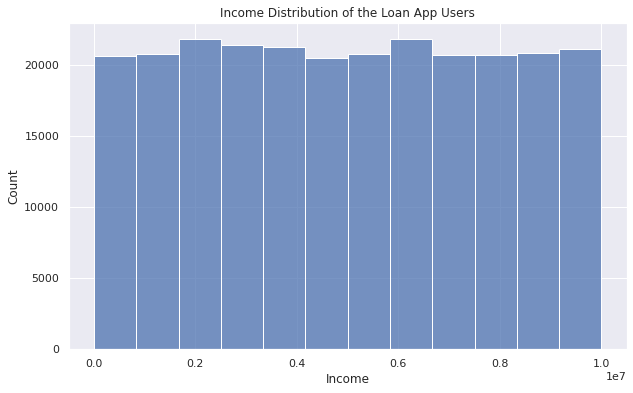

In [ ]:
#PLotting the Income Distribution of the Loan App Users
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=loan_data, x='Income',bins=12)
ax.set_title('Income Distribution of the Loan App Users')

The Income of the Loan App Users was uniformly distributed across the board.

Text(0.5, 1.0, 'Age Distribution of the Loan App Users')

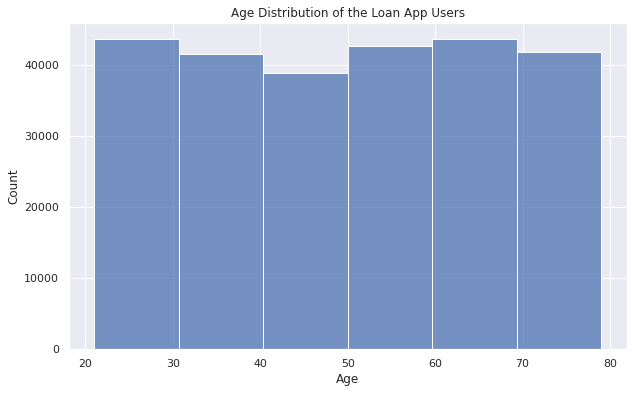

In [ ]:
#Plotting the Age Distribution of the Loan App Users
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=loan_data, x='Age', bins=6)
ax.set_title('Age Distribution of the Loan App Users')


There was no significant difference between the number of users between the different age groups. The 40-50 age group had the least number of users at 39,000 whereas the other age groups averaged over 40,000 users.

Text(0.5, 1.0, 'Distribution of Years of Experience of the Loan App Users')

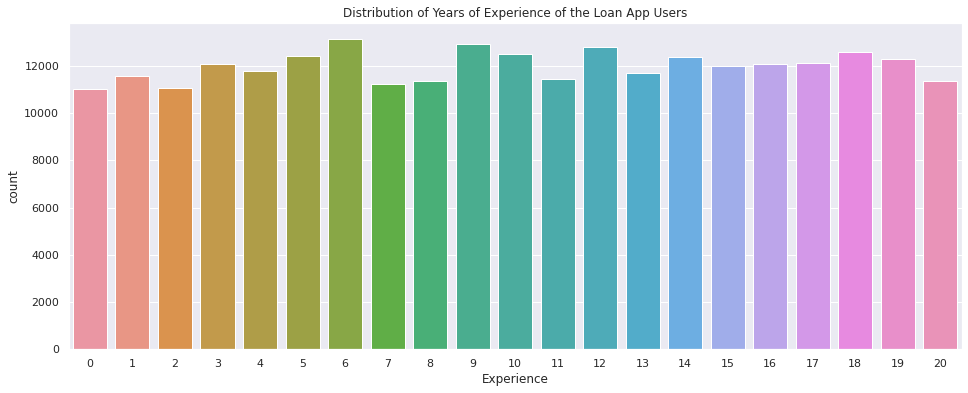

In [ ]:
#Plotting the distribution of the years of experience of the users
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Experience')
ax.set_title('Distribution of Years of Experience of the Loan App Users')

Users with 6 years of experience were the the majority of users of the Loan App.

Text(0.5, 1.0, 'Distribution of the Years spent at Current Job')

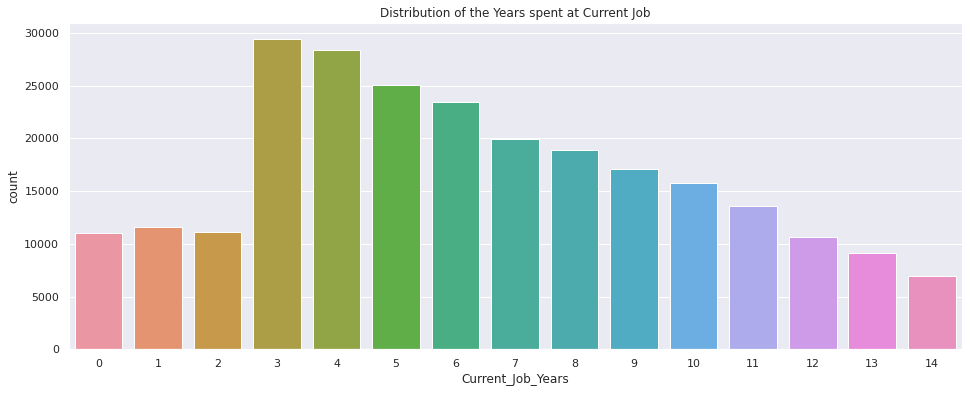

In [ ]:
#Plot showing the Distribution of Years Spent at Current Job.
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Current_Job_Years')
ax.set_title('Distribution of the Years spent at Current Job')

Users who have spent 3-6 years at their current job made up the majority of the Loan App Users.

Text(0.5, 1.0, 'Distribution of the Years spent at Current House')

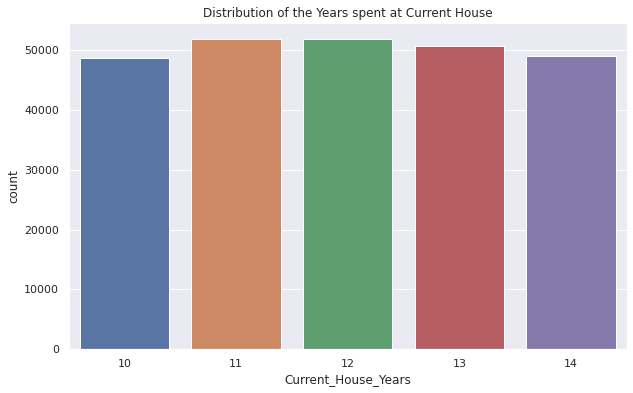

In [ ]:
# Plot showing the Distribution of the years spent at the current house
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Current_House_Years')
ax.set_title('Distribution of the Years spent at Current House')

Text(0.5, 1.0, 'Marital Status of the Loan App Users')

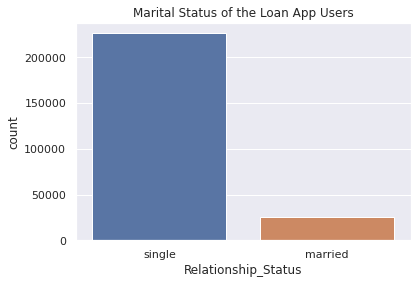

In [ ]:
#Plot showing the Relationship Status of the Loan App Users
ax = sns.countplot(data=loan_data, x='Relationship_Status')
ax.set_title('Marital Status of the Loan App Users')

Majority of the Users are Single.

Text(0.5, 1.0, 'House Ownership Status of the Loan App Users')

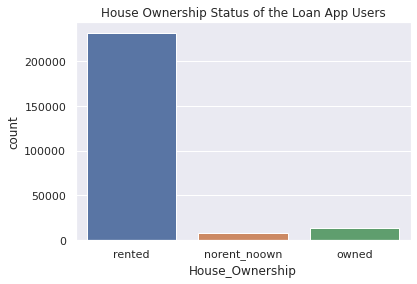

In [ ]:
#House Ownership Status of the Loan App Users
ax = sns.countplot(data=loan_data, x='House_Ownership')
ax.set_title('House Ownership Status of the Loan App Users')

Majority of the Loan App users were renters as opposed to those who owned their homes and those who neither owned nor rented.

Text(0.5, 1.0, 'Car Ownership Status of the Loan App Users')

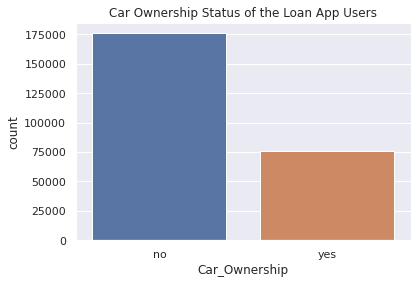

In [ ]:
#Plot showing the Car Ownsership Status of the Loan App Users
ax = sns.countplot(data=loan_data, x='Car_Ownership')
ax.set_title('Car Ownership Status of the Loan App Users')

Majority if the App Users did not own a car.

Text(0.5, 1.0, 'Risk Flag Status of the Loan App Users')

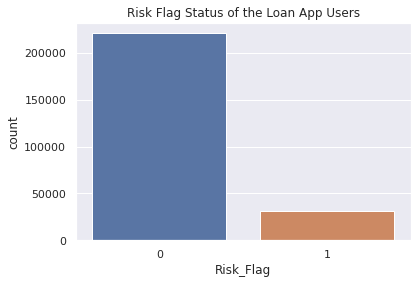

In [ ]:
#Plot showing the Risk_Flag distribution of the Loan App Users
ax = sns.countplot(data=loan_data, x='Risk_Flag')
ax.set_title('Risk Flag Status of the Loan App Users')

### 2.2. Bivariate Data Analysis

Text(0.5, 1.0, 'Car Ownership Status of the Loan App Users Against Risk_Flag')

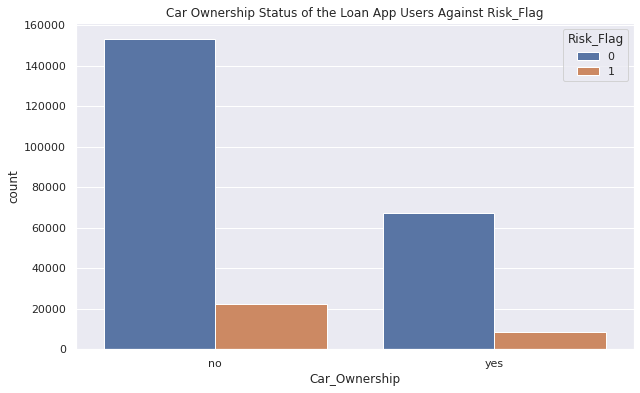

In [ ]:
#Plot showing the Car Ownership Status of the Users against the risk flag
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Car_Ownership',hue='Risk_Flag')
ax.set_title('Car Ownership Status of the Loan App Users Against Risk_Flag')

The amount of users who were at risk of defaulting on their loans were proportionate against those users with and without a car.

Text(0.5, 1.0, 'Marital Status of the Loan App Users against Risk Flag')

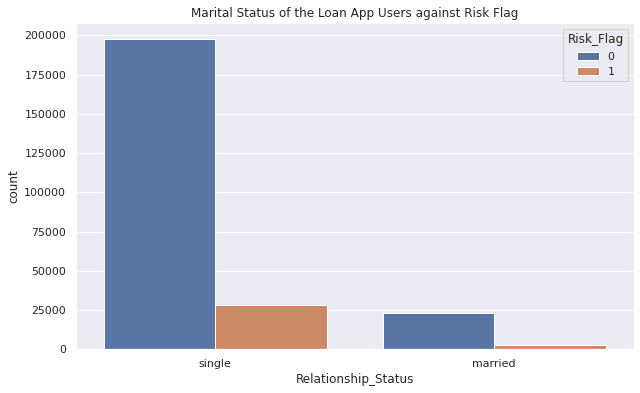

In [ ]:
#Plot showing the Marital Status of the Loan App users against the Risk Flag
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Relationship_Status',hue='Risk_Flag')
ax.set_title('Marital Status of the Loan App Users against Risk Flag')

The amount of users who were at risk of defaulting on their loans were proportionate against those users who were single or those that were married.

Text(0.5, 1.0, 'Distribution of the Years spent at Current Job against Risk_Flag')

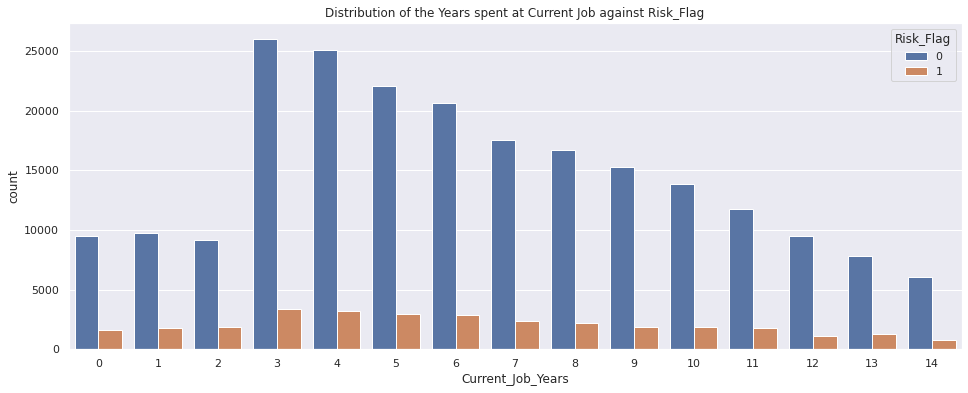

In [ ]:
#Plot showing the Current Job Status of the Loan App users against the Risk Flag
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Current_Job_Years',hue='Risk_Flag')
ax.set_title('Distribution of the Years spent at Current Job against Risk_Flag')

The amount of users who were at risk of defaulting on their loans were proportionate across the number of years users have spent at their current jobs.

Text(0.5, 1.0, 'Distribution of the Years spent at Current House against Risk Flag')

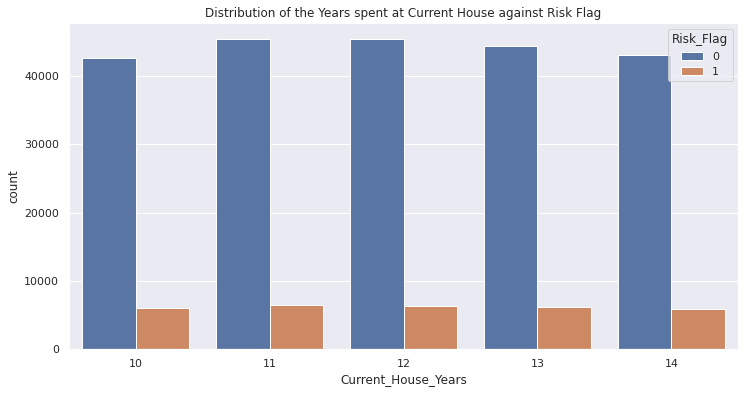

In [ ]:
#Distribution of Years Spent at Current House
plt.figure(figsize=(12,6))
ax = sns.countplot(data=loan_data, x='Current_House_Years',hue='Risk_Flag')
ax.set_title('Distribution of the Years spent at Current House against Risk Flag')

Text(0.5, 1.0, 'Distribution of Years of Experience of the Loan App Users')

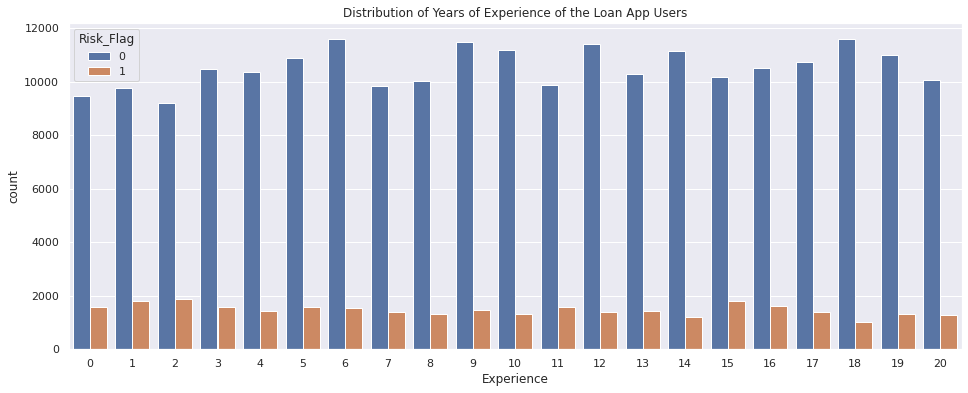

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Experience',hue='Risk_Flag')
ax.set_title('Distribution of Years of Experience of the Loan App Users')

In [ ]:
#Encoding the Categorical Variables using a Label Encoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
loan_data['Relationship_Status'] = en.fit_transform(loan_data['Relationship_Status'])
loan_data['House_Ownership'] = en.fit_transform(loan_data['House_Ownership'])
loan_data['Car_Ownership'] = en.fit_transform(loan_data['Car_Ownership'])
loan_data['Profession'] = en.fit_transform(loan_data['Profession'])
loan_data['State'] = en.fit_transform(loan_data['State'])
loan_data

,Id,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
0,1,1303834,23,3,1,2,0,33,Rewa,13,3,13,0
1,2,7574516,40,10,1,2,0,43,Parbhani,14,9,13,0
2,3,3991815,66,4,0,2,0,47,Alappuzha,12,4,10,0
3,4,6256451,41,2,1,2,1,43,Bhubaneswar,17,2,12,1
4,5,5768871,47,11,1,2,0,11,Tiruchirappalli[10],22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,Kolkata,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,Rewa,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,Kalyan-Dombivli,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,Pondicherry,18,0,10,0


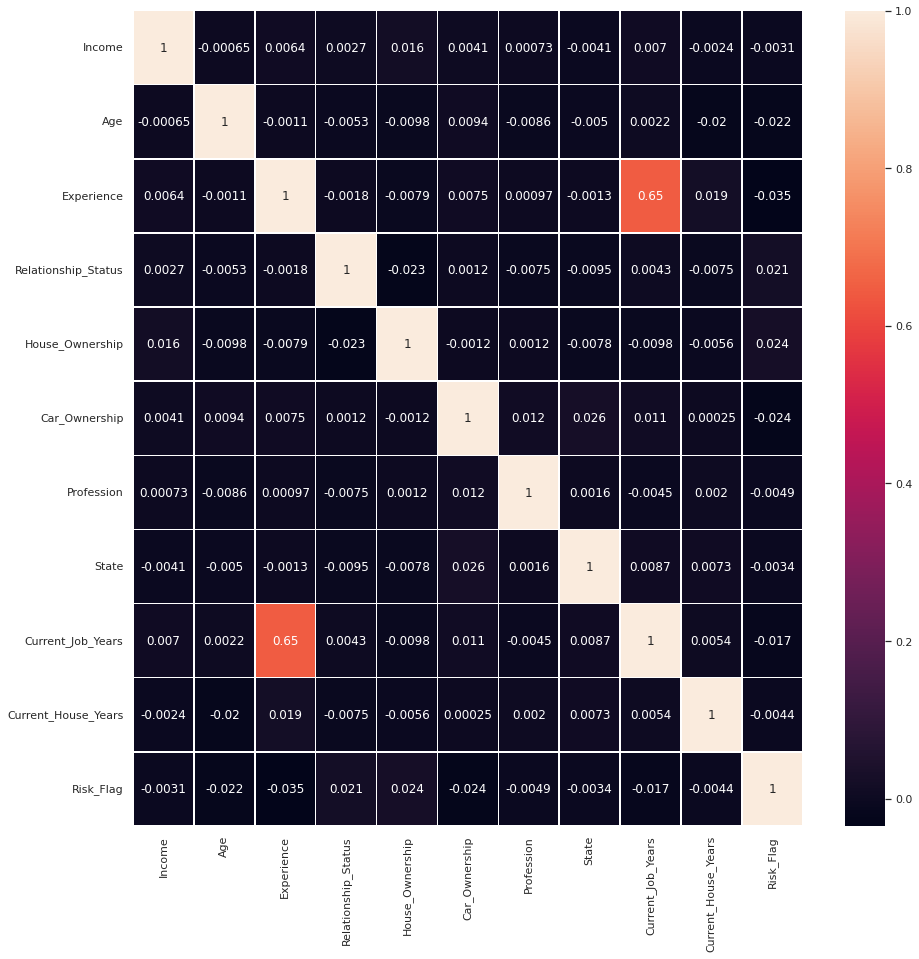

In [ ]:
# Subsetting the data
df = loan_data.drop(['Id',"City"],1)

# Creating a correlation matrix
corrMatrix = df.corr()
corrMatrix

# Vizualising the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

* From the Correlation Heatmap I noted that there is a strong positive correlation ( Pearson Coefficient = 0.65) between the Experience and the Current Job years variables.

* None of the other variables were significantly correlated.

### 2.3. Multivariate Data Analysis

The Curse of Dimensionality

---
* The curse of dimensionality is a problem that arises when we are working with highly dimensional data. The dimension of the data refers to the number of features in the predicitve model.
* There is a relationship between dimensionality and overfitting which is as follows:
   * dimensionality is directly proportional to overfitting i.e. as the dimensionality increases the chances of overfitting also increases.
* Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its natural dimension.
* Dimensionality reduction techniques address the “curse of dimensionality” by extracting new features from the data, rather than removing low-information features.

 

Advantages of Dimensionality Reduction:

---


* It reduces the dimensions of our dataset, and hence it reduces storage space.
* It reduces computation time as less no. of dimensions mean less computing is required which means that algorithms train faster than compared to before.
* Multicollinearity is reduced.
* Models accuracy may improve as well.

#### 2.3.1. Linear Discriminant Analysis

* * Linear Discriminant Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems.




In [ ]:
# Separating the target variable from the features
X = loan_data.drop(['Id',"City",'Risk_Flag'],1)
y = loan_data['Risk_Flag']

X.head()

,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,State,Current_Job_Years,Current_House_Years
0,1303834,23,3,1,2,0,33,13,3,13
1,7574516,40,10,1,2,0,43,14,9,13
2,3991815,66,4,0,2,0,47,12,4,10
3,6256451,41,2,1,2,1,43,17,2,12
4,5768871,47,11,1,2,0,11,22,3,14


In [ ]:
# Import Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Creating an instance 
lda = LDA()

lda_= lda.fit(X,y)
lda_feat = lda_.transform(X)

# Display the coeficients 
lda_.coef_

array([[-3.48210627e-09, -3.83797317e-03, -2.04626103e-02,
         2.15395195e-01,  1.84411646e-01, -1.56403858e-01,
        -9.49143254e-04, -8.54912887e-04,  7.98233935e-03,
        -8.21386960e-03]])

In [ ]:
#Creating a dataframe to  that extract the names of the columns
pd.set_option('display.float_format', lambda x: '%.7f' % x)
f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
Relationship_Status,0.2153952
House_Ownership,0.1844116
Current_Job_Years,0.0079823
Income,-0.0000000
State,-0.0008549
Profession,-0.0009491
Age,-0.0038380
Current_House_Years,-0.0082139
Experience,-0.0204626
Car_Ownership,-0.1564039


Recommendation

---


From this Analysis I recommend that the:
* Relationship Status
* House Ownership 
* Current Number of Years spent at the Job 

would be the ideal variables to used to predict whether a customer is likely to default on their loan or not.
